# Smoke Detection data AutoML

##### Statement: except the correlation heat map and OLS statistics are used from example, all other codes are done by myself

### Data Set
The data set consists of :
1. 14  characteristics of the situation that smoke detection at i.e.  - The independent variables
2. The condition of fire alarm - The dependent variable  
3. The condition of fire alarm is represented by 0 and 1..
4. There are a total of 62631 observations. 

### The meaning of every features
UTC - The time when experiment was performed.
<br>Temperature - Temperature of Surroundings. Measured in Celsius
<br>Humidity - The air humidity during the experiment.
<br>TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
<br>eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
<br>Raw H2 - The amount of Raw Hydrogen present in the surroundings.
<br>Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
<br>Pressure - Air pressure. Measured in hPa
<br>PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
<br>PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
<br>NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
<br>NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
<br>NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
<br>CNT - Simple Count.
<br>Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

<br>Dropping fields
<br>UTC - Just a timestamp
<br>CNT - Stores the count

### Abstract
For binary classification, multi classification and regression: 
<br>Analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance. 

### Package Initialization

In [ ]:
!pip install xgboost

In [ ]:
# for outlier preprocessing 
pip install datasist

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
!pip install requests
!pip install tabulate
!pip install future

In [4]:
!pip uninstall h2o

In [5]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=b86b9624d3b7c71df1fcea89266c19530a10338642f23de34833f43712a8d781
  Stored in directory: c:\users\85251\appdata\local\pip\cache\wheels\6a\61\e9\fc16eec83a229e4b5256e44978505cff2fe032c4e111a920dd
Successfully built h2o


### Initiate H2O

In [191]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 17 hours 8 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_85251_7a718e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.831 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


## 1. Binary Classification(Using all variables to classificate the fire alarm which is a 0/1 variable)

In [93]:
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)

### Check the correlation between all features in the data

In [182]:
data.corr()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.105304,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916


### Create the heat map of the correlation

<AxesSubplot:>

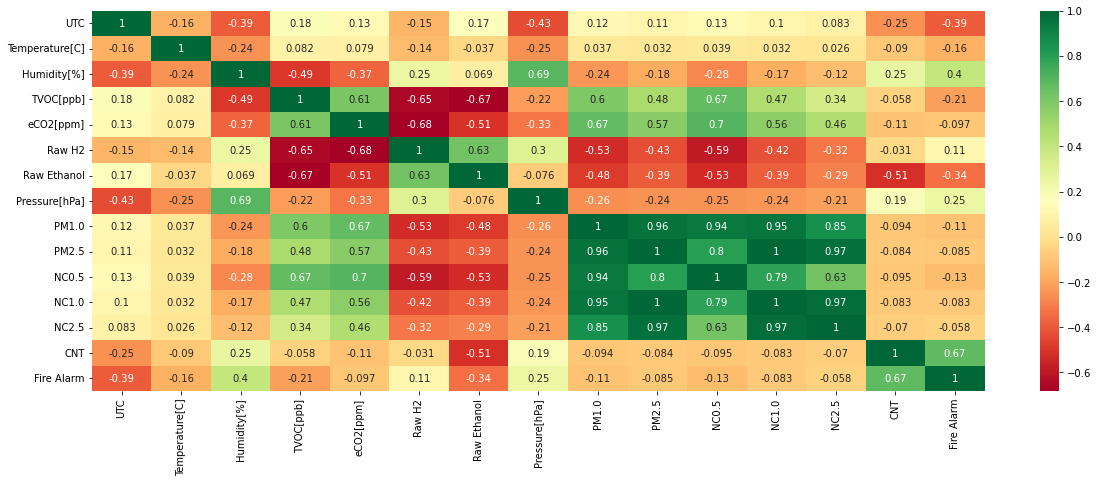

In [183]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

### Identifing predictor significance

In [184]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Fire Alarm'], data[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Fire Alarm   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          3.345e+04
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:55:48   Log-Likelihood:                         -15630.
No. Observations:               62630   AIC:                                  3.128e+04
Df Residuals:                   62618   BIC:                                  3.139e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Temperature[C]    -0.0029   9.03e-05    -31.702      0.000      -0.003      -0.003
Humidity[%]        0.0035      0.000     18.180      0.000       0.003       0.004
TVOC[ppb]      -3.543e-05    3.1e-07   -114.193      0.000    -3.6e-05   -3.48e-05
eCO2[ppm]       2.161e-05   1.07e-06     20.153      0.000    1.95e-05    2.37e-05
Raw H2             0.0005   7.45e-06     61.546      0.000       0.000       0.000
Raw Ethanol       -0.0007   3.18e-06   -215.555      0.000      -0.001      -0.001
Pressure[hPa]      0.0088      0.000     77.450      0.000       0.009       0.009
PM1.0              1.5334      0.420      3.655      0.000       0.711       2.356
PM2.5             -0.1874      0.426     -0.440      0.660      -1.022       0.647
NC0.5             -1.0298      0.079    -13.062      0.000      -1.184      -0.875
NC1.0              5.5675      0.727      7.662      0.000       4.143       6.992
NC2.5             -9.3322      0.934     -9.987      0.000     -11.164      -7.501
==============================================================================
Omnibus:                     7691.811   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14451.922
Skew:                          -0.802   Prob(JB):                         0.00
Kurtosis:                       4.722   Cond. No.                     2.23e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

Except **PM2.5** has the p-value 0.646, which is greater and hence it is a non significant feature, all other features are significant.


### VIF(multicollinearity)

In [185]:
df = data[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]','Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']].dropna() #subset the dataframe

In [186]:
# the independent variables set
X = data[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature           VIF
0   Temperature[C]  2.440613e+00
1      Humidity[%]  5.838411e+01
2        TVOC[ppb]  4.049227e+00
3        eCO2[ppm]  3.046422e+00
4           Raw H2  6.044525e+03
5      Raw Ethanol  2.561682e+03
6    Pressure[hPa]  7.359197e+03
7            PM1.0  9.842105e+10
8            PM2.5  4.639299e+11
9            NC0.5  7.440769e+10
10           NC1.0  1.695632e+12
11           NC2.5  6.689839e+11


### Regularization

In [204]:
# change the name of columns
data['Humidity']=data['Humidity[%]']
data['Temperature']=data['Temperature[C]']
data['TVOC']=data['TVOC[ppb]']
data['ECO2']=data['eCO2[ppm]']
data['Pressure']=data['Pressure[hPa]']

In [205]:
X = data[ [ 'Temperature', 'Humidity', 'TVOC', 'ECO2',
       'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['Fire Alarm']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [206]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [208]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.29953726111228485

###  H2O

In [94]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [95]:
data.head()

UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
1.65473e+09,20,57.36,0,400,12306,18520,939.735,0,0,0,0,0,0,0
1.65473e+09,20.015,56.67,0,400,12345,18651,939.744,0,0,0,0,0,1,0
1.65473e+09,20.029,55.96,0,400,12374,18764,939.738,0,0,0,0,0,2,0
1.65473e+09,20.044,55.28,0,400,12390,18849,939.736,0,0,0,0,0,3,0
1.65473e+09,20.059,54.69,0,400,12403,18921,939.744,0,0,0,0,0,4,0
1.65473e+09,20.073,54.12,0,400,12419,18998,939.725,0,0,0,0,0,5,0
1.65473e+09,20.088,53.61,0,400,12432,19058,939.738,0,0,0,0,0,6,0
1.65473e+09,20.103,53.2,0,400,12439,19114,939.758,0,0,0,0,0,7,0
1.65473e+09,20.117,52.81,0,400,12448,19155,939.758,0,0,0,0,0,8,0
1.65473e+09,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0,4.369,2.78,9,0


In [96]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [97]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [98]:
drift_data["is_train"].table()

is_train,Count
0,15678
1,46952


### Start to train in 10 models by AutoML

In [101]:
x = list(set(train.col_names) - set(["Fire Alarm"]))

In [102]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Fire Alarm", training_frame=train)

AutoML progress: |
18:52:28.412: AutoML: XGBoost is not available; skipping it.
18:52:28.414: _train param, Dropping bad and constant columns: [is_train]
18:52:28.414: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


18:52:28.933: _train param, Dropping bad and constant columns: [is_train]
18:52:28.933: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████
18:53:07.143: _train param, Dropping bad and constant columns: [is_train]
18:53:07.144: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before t

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221107_185228_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    110                110                         256351                 0            11           10.1909       1             352           180.827

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.0989868841257689e-05
RMSE: 0.0033150971088729345
MAE: 0.000385743129782007
RMSLE: 0.0024783941732072594
Mean Residual Deviance: 1.0989868841257689e-05

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.00010014356604417573
RMSE: 0.010007175727655417
MAE: 0.0007827365210894052
RMSLE: 0.007092608638781458
Mean Residual Deviance: 0.00010014356604417573

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.000782537  0.000104512  0.000954656   0.000798246   0.000730103   0.000745695   0.000683983
mean_residual_deviance  0.000100365  5.21397e-05  0.000125413   7.07278e-05   7.92705e-05   0.000178756   4.76561e-05
mse                     0.000100365  5.21397e-05  0.000125413   7.07278e-05   7.92705e-05   0.000178756   4.76561e-05
r2                      0.999508     0.000255785  0.999385      0.999653      0.999611      0.999123      0.999766
residual_deviance       0.000100365  5.21397e-05  0.000125413   7.07278e-05   7.92705e-05   0.000178756   4.76561e-05
rmse                    0.0097571    0.00254061   0.0111988     0.00840998    0.0089034     0.01337       0.00690334
rmsle                   0.00696546   0.00157059   0.00820463    0.0057603     0.005937      0.00909469    0.00583069

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse          training_mae            training_deviance
---  -------------------  ----------  -----------------  ---------------------  ----------------------  ----------------------
     2022-11-07 18:53:46  4.916 sec   0.0                0.45159359690060247    0.40787355352323523     0.2039367767616238
     2022-11-07 18:53:46  4.957 sec   5.0                0.26690051606709686    0.24102835116368743     0.07123588547688262
     2022-11-07 18:53:46  4.999 sec   10.0               0.15789335908474747    0.14248886202936645     0.024930312843065003
     2022-11-07 18:53:46  5.049 sec   15.0               0.09357079345171845    0.08425143836718323     0.008755493387184158
     2022-11-07 18:53:46  5.094 sec   20.0               0.05568107214024177    0.04983702949985346     0.0031003817946868083
     2022-11-07 18:53:46  5.140 sec   25.0               0.03343546117281298    0.029504095380592624    0.0011179300638386842
     2022-11-07 18:53:46  5.186 sec   30.0               0.02052788473672043    0.01748756910361466     0.0004213940517640796
     2022-11-07 18:53:46  5.233 sec   35.0               0.013288121017100476   0.010402264142861259    0.0001765741601651074
     2022-11-07 18:53:46  5.277 sec   40.0               0.00939478588604983    0.006227636956012882    8.826200184472109e-05
     2022-11-07 18:53:47  5.320 sec   45.0               0.007283839836818161   0.003769811515868079    5.3054322768419214e-05
---  ---                  ---         ---                ---                    ---                     ---
     2022-11-07 18:53:47  5.496 sec   65.0               0.00495614402789883    0.0007573330126775856   2.456336362527724e-05
     2022-11-07 18:53:47  5.539 sec   70.0               0.004729979832119586   0.00059

In [103]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_3_20221107_185228_model_1,0.000782737,0.0100072,0.000100144,0.00709261,0.000100144
GBM_4_AutoML_3_20221107_185228,0.000859179,0.0103244,0.000106593,0.00729803,0.000106593
GBM_2_AutoML_3_20221107_185228,0.000929425,0.0102836,0.000105752,0.0074677,0.000105752
GBM_5_AutoML_3_20221107_185228,0.000930883,0.00958672,9.19053e-05,0.0067269,9.19053e-05
GBM_3_AutoML_3_20221107_185228,0.000969933,0.0100177,0.000100355,0.00720787,0.000100355
StackedEnsemble_AllModels_1_AutoML_3_20221107_185228,0.0011672,0.00970901,9.42648e-05,0.0068493,9.42648e-05
XRT_1_AutoML_3_20221107_185228,0.00123076,0.0101547,0.000103118,0.0073609,0.000103118
DRF_1_AutoML_3_20221107_185228,0.00127758,0.0104419,0.000109034,0.00759134,0.000109034
StackedEnsemble_BestOfFamily_1_AutoML_3_20221107_185228,0.00152981,0.00980829,9.62025e-05,0.00692766,9.62025e-05
GBM_1_AutoML_3_20221107_185228,0.00233834,0.0128243,0.000164464,0.0094143,0.000164464


In [104]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 3.0931702930614993e-05
RMSE: 0.00556162772312342
MAE: 0.0005615193765949333
RMSLE: 0.003671003926004589
Mean Residual Deviance: 3.0931702930614993e-05

### The importance of every variables

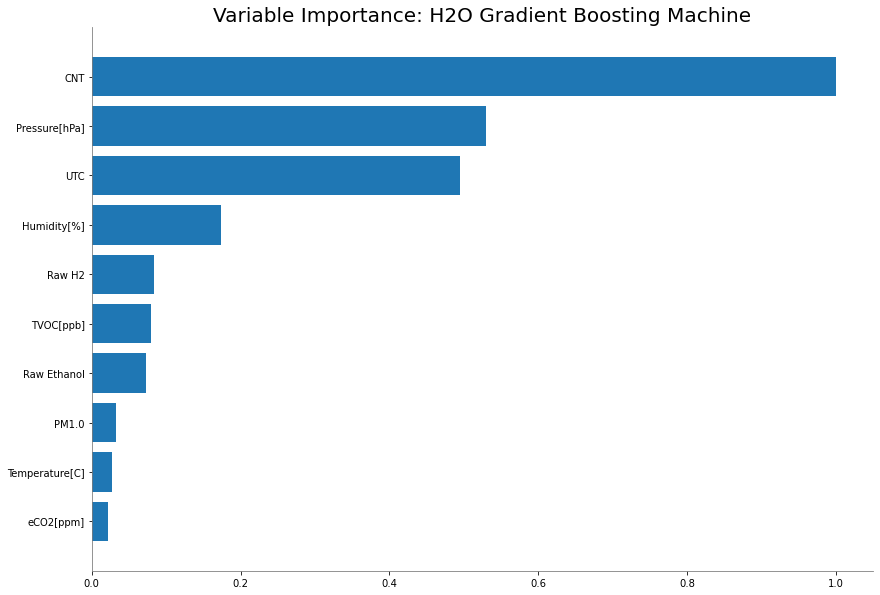

<Figure size 432x288 with 0 Axes>

In [105]:
%matplotlib inline
best_model.varimp_plot()

### Answers for questions

**Is the relationship significant?**
<br>A: yes, because the R-sqaured is 0.865 which is very high and all features' p value is 0 except PM2.5, so the relationship is very much significant

**Are any model assumptions violated?**
<br>A: no, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**
<br>A: yes, from the VIF data, we could know that except temperature, TVOC, and eCo2, all other variables have more or less correlationship with each other, may be because they are all about the condition of air.

**In the multivariate models are predictor variables independent of all the other predictor variables?**
<br>A: No, they are not all independent of each other, we can know that from the correlation heap map. 

1.features like PMs' and NCs' that describe the particles in the air have a strong correlation with each other

2.TVOC have a strong correlation with Raw ethanol


**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
<br>A: the most significant predictor variable is CNT, however, CNT is actually the number of data, and C1 is index, so pressure should be the most significant predictor variable, and UTC and PM1.0 are the most insiginificant one.

**Does the model make sense?**
<br>A: yes, the qustion is a classification question and models in AutoML can deal with it.

**Does regularization help?****
<br>no, the rmse from the best model is 0.0053, however, in regularization, the rmse is 0.2997

**Which independent variables are significant?**
<br>the most significant predictor variable is CNT, however, CNT is actually the number of data, and C1 is index, so pressure should be the most significant predictor variable

**Which hyperparameters are important?**
<br>all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Coding professionalism?**
<br>yes.


## 2. Regression(using PM1.0, NC0.5, NC1.0, NC2.5 to predict PM1.0)

In [22]:
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)

In [23]:

# change the name of columns
data['Humidity']=data['Humidity[%]']
data['Temperature']=data['Temperature[C]']
data['TVOC']=data['TVOC[ppb]']
data['ECO2']=data['eCO2[ppm]']
data['Pressure']=data['Pressure[hPa]']
data.drop(columns = ['UTC','CNT','Humidity[%]','Temperature[C]','TVOC[ppb]','eCO2[ppm]','Pressure[hPa]'],inplace = True)

In [25]:
data.drop(columns = ['Raw H2','Raw Ethanol','Fire Alarm','Humidity','Temperature','TVOC','ECO2','Pressure'],inplace = True)

In [26]:
data

,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.00,0.00,0.00,0.000,0.000
1,0.00,0.00,0.00,0.000,0.000
2,0.00,0.00,0.00,0.000,0.000
3,0.00,0.00,0.00,0.000,0.000
4,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...
62625,0.63,0.65,4.32,0.673,0.015
62626,0.61,0.63,4.18,0.652,0.015
62627,0.57,0.60,3.95,0.617,0.014
62628,0.57,0.59,3.92,0.611,0.014


### Check the correlation between all features in the data

In [27]:
data.corr()

,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
PM1.0,1.000000,0.956118,0.940045,0.949860,0.854901
PM2.5,0.956118,1.000000,0.798873,0.999787,0.969382
NC0.5,0.940045,0.798873,1.000000,0.786274,0.626711
NC1.0,0.949860,0.999787,0.786274,1.000000,0.974249
NC2.5,0.854901,0.969382,0.626711,0.974249,1.000000


### Create the heat map of the correlation

<AxesSubplot:>

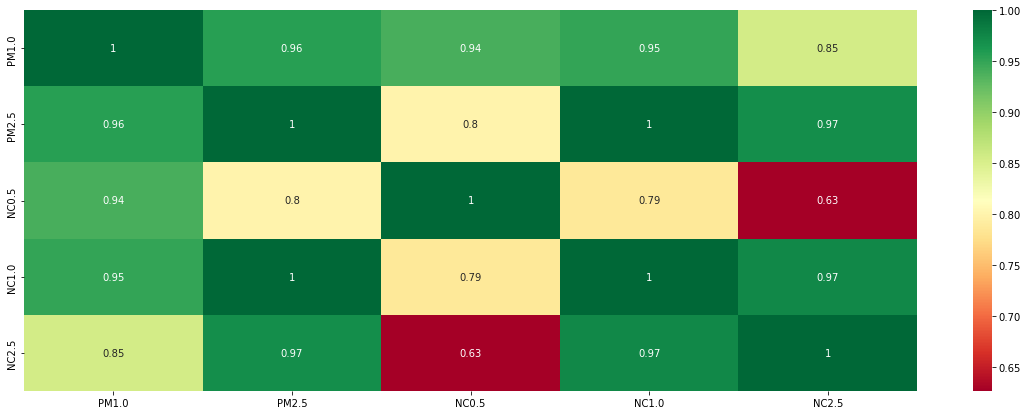

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

### Identifing predictor significance

In [29]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['PM1.0'], data[['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PM1.0   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.540e+15
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:33:52   Log-Likelihood:                      2.7582e+05
No. Observations:               62630   AIC:                                 -5.516e+05
Df Residuals:                   62626   BIC:                                 -5.516e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM2.5          0.0356      0.004      8.791      0.000       0.028       0.044
NC0.5          0.0205      0.001     27.508      0.000       0.019       0.022
NC1.0          0.7875      0.006    127.980      0.000       0.775       0.800
NC2.5         -0.9539      0.008   -118.893      0.000      -0.970      -0.938
==============================================================================
Omnibus:                     1362.422   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.751
Skew:                          -0.051   Prob(JB):                    1.27e-159
Kurtosis:                       2.480   Cond. No.                     4.18e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

All features are significant.


### VIF(multicollinearity)

In [30]:
df = data[['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']].dropna() #subset the dataframe

In [35]:
# the independent variables set
X = data[['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature           VIF
0   PM2.5  4.630475e+11
1   NC0.5  7.310089e+10
2   NC1.0  1.339360e+12
3   NC2.5  5.433552e+11


### Regularization

In [36]:
X = data[ [ 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['PM1.0']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [38]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.0031515826660682236

### H2O

In [40]:
data.head()

,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [42]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [43]:
data

PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0.9,3.78,0,4.369,2.78


In [44]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [45]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [46]:
drift_data["is_train"].table()

is_train,Count
0,15678
1,46952


### Start to train in 10 models by AutoML

In [48]:
x = list(set(train.col_names) - set(["PM1.0"]))

In [49]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="PM1.0", training_frame=train)

AutoML progress: |
17:47:02.667: AutoML: XGBoost is not available; skipping it.
17:47:02.698: _train param, Dropping bad and constant columns: [is_train]


17:47:03.590: _train param, Dropping bad and constant columns: [is_train]

██████
17:47:21.685: _train param, Dropping bad and constant columns: [is_train]


17:47:24.444: _train param, Dropping bad and constant columns: [is_train]

██
17:47:28.898: _train param, Dropping bad and constant columns: [is_train]

██
17:47:33.974: _train param, Dropping bad and constant columns: [is_train]

█
17:47:38.587: _train param, Dropping bad and constant columns: [is_train]

█
17:47:41.129: _train param, Dropping bad and constant columns: [is_train]

██
17:47:44.270: _train param, Dropping bad and constant columns: [is_train]

█
17:47:45.531: DeepLearning_1_AutoML_1_20221107_174702 [DeepLearning def_1] failed: DistributedException from /127.0.0.1:54321: '

Trying to predict with an unstable model.
Job was aborted due to observed numerical instabi

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20221107_174702


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    159                159                         96683                  6            6            6             18            64            43.6792

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.128985316456186
RMSE: 1.0625372070926205
MAE: 0.14729350498310326
RMSLE: 0.03565582333760666
Mean Residual Deviance: 1.128985316456186

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 256.8506344034608
RMSE: 16.026560279843608
MAE: 0.8950265347396351
RMSLE: 0.029602687712811018
Mean Residual Deviance: 256.8506344034608

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.89503    0.103661     0.733407      0.885887      1.02041       0.914152      0.921291
mean_residual_deviance  256.852    88.6446      123.761       315.097       350.748       273.095       221.561
mse                     256.852    88.6446      123.761       315.097       350.748       273.095       221.561
r2                      0.999701   9.95586e-05  0.999854      0.999636      0.999598      0.999682      0.999733
residual_deviance       256.852    88.6446      123.761       315.097       350.748       273.095       221.561
rmse                    15.8029    2.98339      11.1248       17.751        18.7283       16.5256       14.8849
rmsle                   0.0289289  0.00702158   0.0203334     0.034644      0.0282203     0.0242533     0.0371934

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae         training_deviance
---  -------------------  ----------  -----------------  ------------------  -------------------  -------------------
     2022-11-07 17:47:43  2.606 sec   0.0                924.6559030233993   194.57442059056402   854988.538996018
     2022-11-07 17:47:43  2.624 sec   5.0                546.6580206575588   114.86026658134897   298834.99154924
     2022-11-07 17:47:43  2.641 sec   10.0               323.10710890304523  67.80143970672665    104398.20382368432
     2022-11-07 17:47:43  2.657 sec   15.0               191.36647340024598  40.050331954819896   36621.12714164705
     2022-11-07 17:47:43  2.675 sec   20.0               113.57404853576463  23.645720506003993   12899.064500804221
     2022-11-07 17:47:43  2.692 sec   25.0               67.50409706425019   13.963295565734846   4556.803120459712
     2022-11-07 17:47:43  2.709 sec   30.0               40.33012238532517   8.244987738440333    1626.5187716153062
     2022-11-07 17:47:43  2.725 sec   35.0               24.336437086372968  4.873229395148023    592.2621700589896
     2022-11-07 17:47:43  2.743 sec   40.0               15.103170769449456  2.887276431029135    228.1057672911525
     2022-11-07 17:47:43  2.759 sec   45.0               9.721691144583021   1.7406102513969735   94.51127871066394
---  ---                  ---         ---                ---                 ---                  ---
     2022-11-07 17:47:44  2.987 sec   115.0              1.6220387688608775  0.19696770681916156  2.631009767687711
     2022-11-07 17:47:44  3.003 sec   120.0              1.535476021215518   0.18986660629895055  2.3576866117278383
     2022-11-07 17:47:44  3.019 sec   125.0              1.4549612452454355  0.1828711528484093   2.1169122251661485
     2022-11-07 17:47:44  3.037 sec   130.0              1.

In [50]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_5_AutoML_1_20221107_174702,0.895027,16.0266,256.851,0.0296027,256.851
GBM_3_AutoML_1_20221107_174702,1.01884,18.4603,340.782,0.0125567,340.782
GBM_2_AutoML_1_20221107_174702,1.03379,17.4286,303.757,0.025089,303.757
GBM_4_AutoML_1_20221107_174702,1.10197,19.9916,399.665,0.00640033,399.665
GBM_grid_1_AutoML_1_20221107_174702_model_1,1.37746,23.9635,574.248,0.119215,574.248
StackedEnsemble_AllModels_1_AutoML_1_20221107_174702,2.1729,13.8769,192.569,0.468626,192.569
DRF_1_AutoML_1_20221107_174702,2.25336,25.4897,649.724,0.291668,649.724
XRT_1_AutoML_1_20221107_174702,2.35867,26.1044,681.441,0.294905,681.441
StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_174702,2.48252,14.5861,212.755,0.518078,212.755
GBM_1_AutoML_1_20221107_174702,3.75355,54.4145,2960.93,0.0138908,2960.93


In [51]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 191.41408692329884
RMSE: 13.835247989222992
MAE: 0.7653987957082851
RMSLE: 0.03514485441648221
Mean Residual Deviance: 191.41408692329884

### The importance of every variables

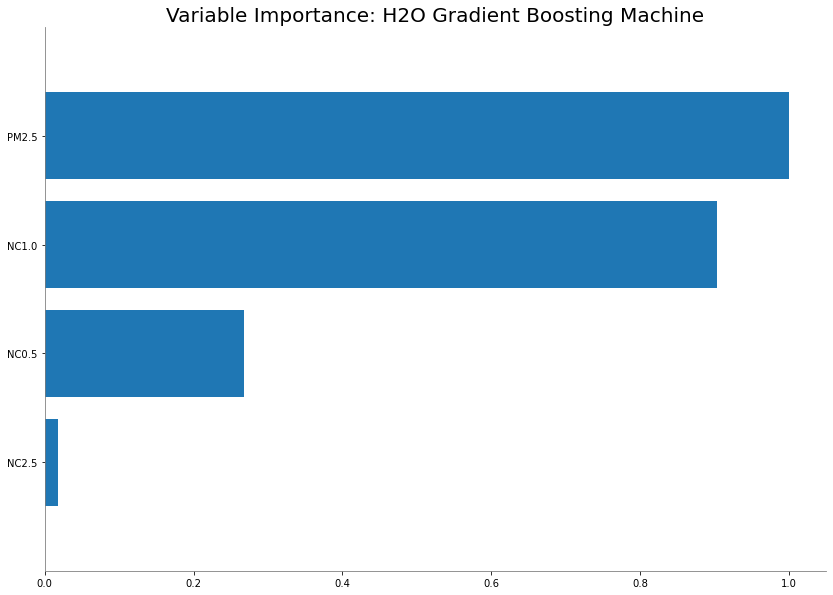

<Figure size 432x288 with 0 Axes>

In [52]:
%matplotlib inline
best_model.varimp_plot()

### Answers for questions

**Is the relationship significant?**
<br>A: yes, because the R-sqaured is 1 which is very high and all features' p value is 0, so the relationship is very much significant

**Are any model assumptions violated?**
<br>A: no, the model is regression which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**
<br>A: yes, from the VIF data, we could know that all variables have correlationship with each other, may be because they are all about the condition of air.

**In the multivariate models are predictor variables independent of all the other predictor variables?**
<br>A: No, they are not all independent of each other, we can know that from the correlation heap map. 

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
<br>A: the most significant predictor variable is PM2.5, and NC2.5 is the most insiginificant one.

**Does the model make sense?**
<br>A: yes, the qustion is a regression question and models in AutoML can deal with it.

**Does regularization help?****
<br>yes, the rmse from the best model is 13.8 which is very high, however, in regularization, the rmse is 0.003

**Which independent variables are significant?**
<br>the most significant predictor variable is PM2.5

**Which hyperparameters are important?**
<br>all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Coding professionalism?**
<br>yes.


## 3. Muticlassification(using all other variables to  classificate Humidity which will be transferd to 0, 1, 2, 3)

In [69]:
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)

In [57]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [70]:
# transfer the Humidity
for i in data.index:
    if data.loc[i,'Humidity[%]'] >= 70:
        data.at[i,'Humidity[%]'] = 3
    elif data.loc[i,'Humidity[%]'] >= 50:
        data.at[i,'Humidity[%]'] = 2
    elif data.loc[i,'Humidity[%]'] >= 30:
        data.at[i,'Humidity[%]'] = 1
    else:
        data.at[i,'Humidity[%]'] = 0

In [71]:
set(data['Humidity[%]'])

{0.0, 1.0, 2.0, 3.0}

In [72]:

# change the name of columns
data['Humidity']=data['Humidity[%]']
data['Temperature']=data['Temperature[C]']
data['TVOC']=data['TVOC[ppb]']
data['ECO2']=data['eCO2[ppm]']
data['Pressure']=data['Pressure[hPa]']
data.drop(columns = ['UTC','CNT','Humidity[%]','Temperature[C]','TVOC[ppb]','eCO2[ppm]','Pressure[hPa]'],inplace = True)

In [73]:
data

,Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Humidity,Temperature,TVOC,ECO2,Pressure
0,12306,18520,0.00,0.00,0.00,0.000,0.000,0,2.0,20.000,0,400,939.735
1,12345,18651,0.00,0.00,0.00,0.000,0.000,0,2.0,20.015,0,400,939.744
2,12374,18764,0.00,0.00,0.00,0.000,0.000,0,2.0,20.029,0,400,939.738
3,12390,18849,0.00,0.00,0.00,0.000,0.000,0,2.0,20.044,0,400,939.736
4,12403,18921,0.00,0.00,0.00,0.000,0.000,0,2.0,20.059,0,400,939.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,13723,20569,0.63,0.65,4.32,0.673,0.015,0,0.0,18.438,625,400,936.670
62626,13731,20588,0.61,0.63,4.18,0.652,0.015,0,0.0,18.653,612,400,936.678
62627,13725,20582,0.57,0.60,3.95,0.617,0.014,0,0.0,18.867,627,400,936.687
62628,13712,20566,0.57,0.59,3.92,0.611,0.014,0,0.0,19.083,638,400,936.680


### Check the correlation between all features in the data

In [74]:
data.corr()

,Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Humidity,Temperature,TVOC,ECO2,Pressure
Raw H2,1.000000,0.631495,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007,0.231210,-0.135540,-0.653053,-0.682785,0.303090
Raw Ethanol,0.631495,1.000000,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652,0.011782,-0.037343,-0.673715,-0.506695,-0.075926
PM1.0,-0.530714,-0.480698,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552,-0.184655,0.037330,0.597366,0.665482,-0.258938
PM2.5,-0.431079,-0.393192,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916,-0.140652,0.032084,0.477424,0.572691,-0.243071
NC0.5,-0.587769,-0.529186,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118,-0.215374,0.039291,0.670657,0.699604,-0.248657
NC1.0,-0.422626,-0.385720,0.949860,0.999787,0.786274,1.000000,0.974249,-0.082828,-0.137084,0.031608,0.467386,0.564252,-0.241148
NC2.5,-0.318518,-0.293351,0.854901,0.969382,0.626711,0.974249,1.000000,-0.057707,-0.094293,0.025526,0.344721,0.456323,-0.213390
Fire Alarm,0.107007,-0.340652,-0.110552,-0.084916,-0.128118,-0.082828,-0.057707,1.000000,0.357774,-0.163902,-0.214743,-0.097006,0.249797
Humidity,0.231210,0.011782,-0.184655,-0.140652,-0.215374,-0.137084,-0.094293,0.357774,1.000000,-0.207444,-0.355567,-0.269608,0.549082
Temperature,-0.135540,-0.037343,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902,-0.207444,1.000000,0.082442,0.079265,-0.251203


### Create the heat map of the correlation

<AxesSubplot:>

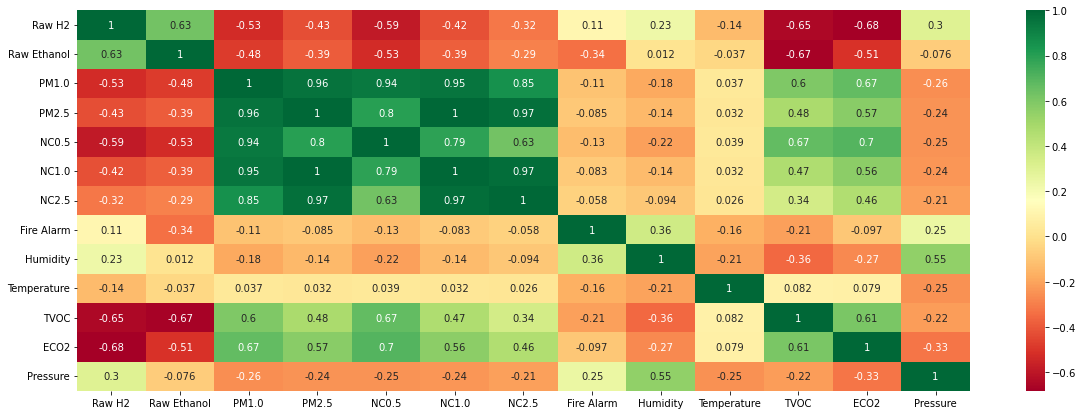

In [75]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

### Identifing predictor significance

In [76]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Humidity'], data[['Temperature', 'Fire Alarm', 'TVOC', 'ECO2',
       'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Humidity   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          4.412e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:15:39   Log-Likelihood:                         -46989.
No. Observations:               62630   AIC:                                  9.400e+04
Df Residuals:                   62618   BIC:                                  9.411e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    -0.0063      0.000    -43.386      0.000      -0.007      -0.006
Fire Alarm      0.1076      0.007     16.356      0.000       0.095       0.120
TVOC         -4.02e-05   4.95e-07    -81.163      0.000   -4.12e-05   -3.92e-05
ECO2        -5.482e-05   1.71e-06    -32.076      0.000   -5.82e-05   -5.15e-05
Raw H2       3.052e-06   1.25e-05      0.244      0.807   -2.14e-05    2.75e-05
Raw Ethanol    -0.0004   6.69e-06    -55.969      0.000      -0.000      -0.000
Pressure        0.0095      0.000     53.747      0.000       0.009       0.010
PM1.0          -1.4619      0.692     -2.112      0.035      -2.819      -0.105
PM2.5           0.4303      0.703      0.612      0.540      -0.947       1.807
NC0.5           0.4049      0.130      3.108      0.002       0.150       0.660
NC1.0          -1.7122      1.199     -1.428      0.153      -4.063       0.639
NC2.5           2.7143      1.543      1.759      0.079      -0.310       5.738
==============================================================================
Omnibus:                    12292.414   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3940.727
Skew:                          -0.393   Prob(JB):                         0.00
Kurtosis:                       2.055   Cond. No.                     2.23e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

### VIF(multicollinearity)

In [77]:
df = data[['Temperature', 'Fire Alarm', 'TVOC', 'ECO2',
       'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']].dropna() #subset the dataframe

In [78]:
# the independent variables set
X = data[['Temperature', 'Fire Alarm', 'TVOC', 'ECO2',
       'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature           VIF
0   Temperature  2.338203e+00
1    Fire Alarm  7.370544e+00
2          TVOC  3.791130e+00
3          ECO2  2.842963e+00
4        Raw H2  6.241737e+03
5   Raw Ethanol  4.165060e+03
6      Pressure  6.601102e+03
7         PM1.0  9.844041e+10
8         PM2.5  4.638821e+11
9         NC0.5  7.460738e+10
10        NC1.0  1.697230e+12
11        NC2.5  6.700290e+11


### Regularization

In [79]:
X = data[['Temperature', 'Fire Alarm', 'TVOC', 'ECO2',
       'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['Humidity']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [80]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [81]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.46270536610347107

### H2O

In [82]:
data.head()

,Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Humidity,Temperature,TVOC,ECO2,Pressure
0,12306,18520,0.0,0.0,0.0,0.0,0.0,0,2.0,20.000,0,400,939.735
1,12345,18651,0.0,0.0,0.0,0.0,0.0,0,2.0,20.015,0,400,939.744
2,12374,18764,0.0,0.0,0.0,0.0,0.0,0,2.0,20.029,0,400,939.738
3,12390,18849,0.0,0.0,0.0,0.0,0.0,0,2.0,20.044,0,400,939.736
4,12403,18921,0.0,0.0,0.0,0.0,0.0,0,2.0,20.059,0,400,939.744


In [83]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [84]:
data

Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Humidity,Temperature,TVOC,ECO2,Pressure
12306,18520,0,0,0,0,0,0,2,20,0,400,939.735
12345,18651,0,0,0,0,0,0,2,20.015,0,400,939.744
12374,18764,0,0,0,0,0,0,2,20.029,0,400,939.738
12390,18849,0,0,0,0,0,0,2,20.044,0,400,939.736
12403,18921,0,0,0,0,0,0,2,20.059,0,400,939.744
12419,18998,0,0,0,0,0,0,2,20.073,0,400,939.725
12432,19058,0,0,0,0,0,0,2,20.088,0,400,939.738
12439,19114,0,0,0,0,0,0,2,20.103,0,400,939.758
12448,19155,0,0,0,0,0,0,2,20.117,0,400,939.758
12453,19195,0.9,3.78,0,4.369,2.78,0,2,20.132,0,400,939.756


In [85]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [86]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [87]:
drift_data["is_train"].table()

is_train,Count
0,15678
1,46952


### Start to train in 10 models by AutoML

In [88]:
x = list(set(train.col_names) - set(["Humidity"]))

In [89]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Humidity", training_frame=train)

AutoML progress: |
18:17:32.636: AutoML: XGBoost is not available; skipping it.
18:17:32.638: _train param, Dropping bad and constant columns: [is_train]


18:17:33.80: _train param, Dropping bad and constant columns: [is_train]

███████
18:17:50.270: _train param, Dropping bad and constant columns: [is_train]

█
18:17:59.645: _train param, Dropping bad and constant columns: [is_train]

█
18:18:06.96: _train param, Dropping bad and constant columns: [is_train]

█
18:18:11.754: _train param, Dropping bad and constant columns: [is_train]

██
18:18:18.469: _train param, Dropping bad and constant columns: [is_train]

███
18:18:28.571: _train param, Dropping bad and constant columns: [is_train]

█
18:18:35.777: _train param, Dropping bad and constant columns: [is_train]

██
18:18:40.979: _train param, Dropping unused columns: [is_train]

██
18:18:41.816: _train param, Dropping unused columns: [is_train]

███████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_2_20221107_181732


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.35727e+06            20           20           20            1107          2898          2156.94

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.0643613367342145
RMSE: 0.25369536206681925
MAE: 0.14955494374689643
RMSLE: 0.1047855900473198
Mean Residual Deviance: 0.0643613367342145

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.062251887839041946
RMSE: 0.2495032822209799
MAE: 0.14904132912193702
RMSLE: 0.10316944220560915
Mean Residual Deviance: 0.062251887839041946

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.149041   0.00121695   0.150637      0.14861       0.148928      0.149662      0.14737
mean_residual_deviance  0.0622519  0.00061748   0.0630907     0.0619017     0.0625197     0.0622866     0.0614607
mse                     0.0622519  0.00061748   0.0630907     0.0619017     0.0625197     0.0622866     0.0614607
r2                      0.830241   0.0015782    0.82797       0.831316      0.829792      0.83004       0.832086
residual_deviance       0.0622519  0.00061748   0.0630907     0.0619017     0.0625197     0.0622866     0.0614607
rmse                    0.249501   0.00123721   0.251179      0.248801      0.250039      0.249573      0.247913
rmsle                   0.103168   0.000562654  0.103937      0.10271       0.103548      0.103025      0.10262

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-11-07 18:17:58  8.255 sec   0                  nan              nan             nan
    2022-11-07 18:17:58  8.371 sec   5                  0.305548         0.150276        0.0933595
    2022-11-07 18:17:58  8.480 sec   10                 0.280505         0.149453        0.0786831
    2022-11-07 18:17:58  8.600 sec   15                 0.267586         0.146973        0.0716023
    2022-11-07 18:17:58  8.714 sec   20                 0.262227         0.147011        0.0687629
    2022-11-07 18:17:59  8.826 sec   25                 0.258971         0.147159        0.0670659
    2022-11-07 18:17:59  8.936 sec   30                 0.256644         0.147549        0.0658662
    2022-11-07 18:17:59  9.045 sec   35                 0.25521          0.14724         0.065132
    2022-11-07 18:17:59  9.151 sec   40                 0.254731         0.149706        0.0648878
    2022-11-07 18:17:59  9.259 sec   45                 0.254477         0.149865        0.0647584
    2022-11-07 18:17:59  9.367 sec   50                 0.253695         0.149555        0.0643613

Variable Importances: 
variable     relative_importance    scaled_importance    percentage
-----------  ---------------------  -------------------  ------------
Pressure     158517                 1                    0.287894
Temperature  153935                 0.971094             0.279573
TVOC         55958.2                0.35301              0.10163
Raw Ethanol  55823.8                0.352162             0.101386
Raw H2       35367.6                0.223115             0.0642337
ECO2         24304.8                0.153326             0.0441417
Fire Alarm   23862.8                0.15

In [90]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DRF_1_AutoML_2_20221107_181732,0.149041,0.249503,0.0622519,0.103169,0.0622519
GBM_4_AutoML_2_20221107_181732,0.149965,0.23907,0.0571545,0.0993712,0.0571545
StackedEnsemble_BestOfFamily_1_AutoML_2_20221107_181732,0.150576,0.23787,0.0565823,0.0996716,0.0565823
StackedEnsemble_AllModels_1_AutoML_2_20221107_181732,0.150584,0.237879,0.0565865,0.0996769,0.0565865
XRT_1_AutoML_2_20221107_181732,0.154865,0.252448,0.0637301,0.104431,0.0637301
GBM_1_AutoML_2_20221107_181732,0.165739,0.257645,0.0663808,0.107537,0.0663808
GBM_3_AutoML_2_20221107_181732,0.16995,0.263168,0.0692576,0.109292,0.0692576
GBM_2_AutoML_2_20221107_181732,0.17725,0.269381,0.0725661,0.112165,0.0725661
GBM_5_AutoML_2_20221107_181732,0.179334,0.270787,0.0733255,0.112429,0.0733255
GBM_grid_1_AutoML_2_20221107_181732_model_1,0.180588,0.280792,0.0788442,0.115972,0.0788442


In [91]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.06212879986111602
RMSE: 0.2492564941202456
MAE: 0.14799989616743905
RMSLE: 0.10301888576714181
Mean Residual Deviance: 0.06212879986111602

### The importance of every variables

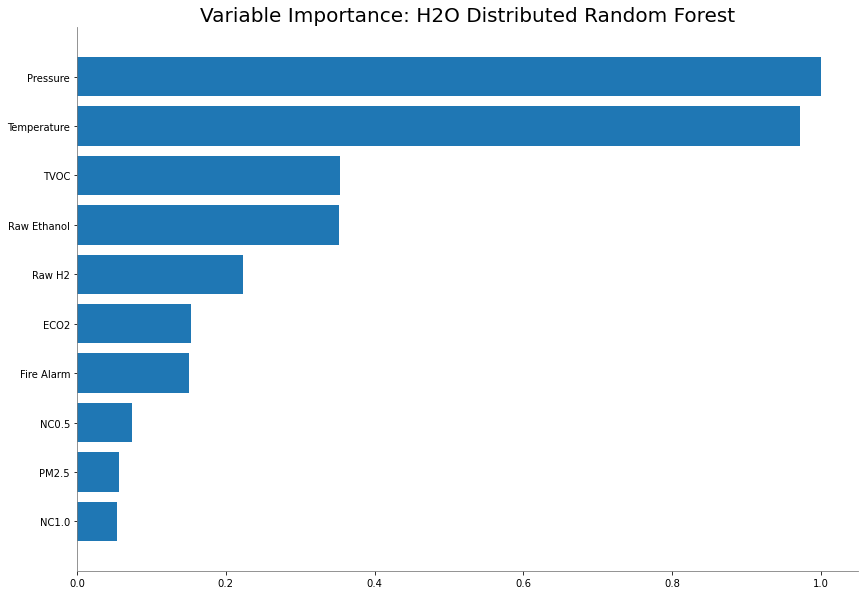

<Figure size 432x288 with 0 Axes>

In [92]:
%matplotlib inline
best_model.varimp_plot()

### Answers for questions

**Is the relationship significant?**
<br>A: yes, because the R-sqaured is 0.894 which is very high and all features' p value is 0 except Raw H2, Pm2.5 and NC1.0, so the relationship is very much significant

**Are any model assumptions violated?**
<br>A: no, the model is a multiclassification which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**
<br>A: yes, from the VIF data, we could know that all variables have correlationship with each other except Temperature, Fire Alarm, TVOC, ECO2, their VIF are relatively low.

**In the multivariate models are predictor variables independent of all the other predictor variables?**
<br>A: No, they are not all independent of each other,especially NC1.0, NC2.5, PM1.0, PM2.5, we can know that from the correlation heap map. 

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
<br>A: the most significant predictor variable is Pressure, and NC1.0 is the most insiginificant one.

**Does the model make sense?**
<br>A: yes, the qustion is a multiclassfication question and models in AutoML can deal with it.

**Does regularization help?****
<br>no, the rmse from the best model is 0.249 which is very high, however, in regularization, the rmse is 0.4627

**Which independent variables are significant?**
<br>the most significant predictor variable is Pressure

**Which hyperparameters are important?**
<br>all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Coding professionalism?**
<br>yes.


### Conclusion and Evaluation
<br>1. As a result, for binary classification, the Gradient Boosting Machine is the one having the best performance. For regression question, Gradient Boosting Machine is also the best one. However, when it comes to the multi classification, Distributed random forest is the best. 
<br>2. In order to avoid overfitting, we could use cross-validation and regularization, besides, having a bigger data is also beneficial for avoiding overfitting.

### Refernces

1. W3schools
2. Generate 'n' unique random numbers within a range
3. A Complete Guide to Dealing with Missing values in Python
4. Smoke Detection Preprocessing


Copyright (c) 2022 Chenxu Zhao

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
